# For viewing the classification metrics and creating plots

# TODO: cell 30 data aggregation...

In [1]:
# imports
import pandas as pd
import sklearn.metrics as metrics
import numpy as np
import matplotlib.pyplot as plt

# display options
pd.options.display.max_columns = 60

In [3]:
# data_pth='/mnt/g/Planet/project_data/classification_stats_x4_400000_global_valid_mod.csv'
# data_pth='/mnt/g/Planet/project_data/classification_stats_x4_400000_shield2_hold_mod_first2k.csv'
# data_pth='/mnt/g/Planet/project_data/classification_stats_x10_local-masked_400000_tmp_1k.csv'
data_pth='/home/ethan_kyzivat/code/pixel-smasher/classification_stats_x10_local-masked_400000_save.csv'

data=pd.read_csv(data_pth)
del data['Unnamed: 0']
data.head()

,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,kappa,kappa_p,min_ndwi,max_ndwi
0,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,SR,8.512153,201.99965,215.0,0.981379,0.223808,3.0,255.0
1,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,HR,8.506076,207.88528,222.0,NaN,NaN,12.0,255.0
2,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,LR,8.637153,207.84766,222.0,NaN,NaN,18.0,255.0
3,0,20170710_181144_1034_3B_AnalyticMS_SR_s0235,0.0,Bic,8.746528,207.83630,222.0,0.969385,-0.164399,8.0,255.0
4,1,20170708_181118_102a_3B_AnalyticMS_SR_s0175,0.0,SR,16.425347,203.24974,232.0,0.974029,0.205630,17.0,255.0


## Now, filter data by image and/or resolution

In [4]:
display(data.shape)
data.describe()

(8520, 11)

,num,thresh,percent_water,mean_ndwi,median_ndwi,kappa,kappa_p,min_ndwi,max_ndwi
count,8520.000000,8520.0,8520.000000,8520.000000,8520.00000,4254.000000,4254.000000,8520.000000,8520.000000
mean,1064.500000,0.0,25.422344,179.488347,197.87770,0.963203,0.007241,17.591197,254.094718
std,614.914056,0.0,21.282928,44.878384,65.19073,0.056458,0.160200,13.534430,13.120356
min,0.000000,0.0,0.000000,6.350768,1.00000,0.005591,-0.746525,0.000000,27.000000
25%,532.000000,0.0,10.633681,164.147423,205.00000,0.962379,-0.105164,8.000000,255.000000
50%,1064.500000,0.0,18.426649,193.678285,223.00000,0.974627,0.000000,16.000000,255.000000
75%,1597.000000,0.0,32.987739,209.177797,233.00000,0.982472,0.119380,25.000000,255.000000
max,2129.000000,0.0,99.878906,240.552080,255.00000,0.996135,0.833572,193.000000,255.000000


In [5]:
# filter to verifiy number of images
data[['num','res','thresh','kappa']].head()
print(f'Number of images: {data.num.unique().size}')

SyntaxError: invalid syntax (<ipython-input-5-1dd8e1a7af32>, line 3)

# Pivot (not Crosstab)

In [6]:
ct=data.pivot(index='num',columns='res')
del ct['thresh']
ct.drop(labels=([('name', 'SR'), ('name','LR'), ('name','Bic')]), axis=1, inplace=True)
ct[:10]
# foo= (ct.name[j] for j in ['LR', 'SR','Bic'])

name percent_water             \
res                                           HR           Bic         HR   
num                                                                         
0    20170710_181144_1034_3B_AnalyticMS_SR_s0235      8.746528   8.506076   
1    20170708_181118_102a_3B_AnalyticMS_SR_s0175     16.420139  16.404514   
2    20170709_180724_1030_3B_AnalyticMS_SR_s0260     13.749566  13.887587   
3    20170710_181144_1034_3B_AnalyticMS_SR_s0274      5.046441   4.648438   
4    20170709_180654_1030_3B_AnalyticMS_SR_s0295     60.030816  60.802517   
5    20170707_181137_1035_3B_AnalyticMS_SR_s0008     91.024740  91.139323   
6    20170709_180523_1005_3B_AnalyticMS_SR_s0304     21.058160  20.802083   
7    20170709_180724_1030_3B_AnalyticMS_SR_s0027      7.805990   7.867622   
8    20170710_181144_1034_3B_AnalyticMS_SR_s0198     14.827691  14.648438   
9    20170707_181137_1035_3B_AnalyticMS_SR_s0065     21.159722  20.144097   

                            mean_ndwi                                     \
res         LR         SR         Bic         HR          LR          SR   
num                                                                        
0     8.637153   8.512153  207.836300  207.88528  207.847660  201.999650   
1    16.145833  16.425347  204.883560  204.96246  204.901920  203.249740   
2    13.975694  14.009983  203.448300  203.53676  203.467010  199.456940   
3     4.991319   4.594184  226.803300  226.93260  226.828550  227.110300   
4    60.156250  60.929687  103.232506  103.32800  103.271270  102.739555   
5    91.145833  91.229601   23.986416   24.00705   23.998264   23.113993   
6    20.963542  20.583767  193.706700  193.75851  193.723950  191.130020   
7     7.682292   8.030816  228.520250  228.69539  228.568570  227.496370   
8    14.670139  14.779948  220.205690  220.36166  220.239580  220.065320   
9    20.659722  19.331597  194.903730  194.93831  194.904510  196.120120   

    median_ndwi                          kappa                     kappa_p  \
res         Bic     HR     LR     SR       Bic  HR  LR        SR       Bic   
num                                                                          
0         222.0  222.0  222.0  215.0  0.969385 NaN NaN  0.981379 -0.164399   
1         233.0  234.0  233.5  232.0  0.966844 NaN NaN  0.974029 -0.205830   
2         224.0  223.0  224.0  219.0  0.968839 NaN NaN  0.979100 -0.313933   
3         237.0  240.0  238.0  241.0  0.937571 NaN NaN  0.970312 -0.113914   
4          27.0   25.0   24.0   27.0  0.971036 NaN NaN  0.980403 -0.146120   
5           3.0    2.0    3.0    1.0  0.992573 NaN NaN  0.994331 -0.004222   
6         229.0  229.0  229.0  225.0  0.976921 NaN NaN  0.979146 -0.061417   
7         250.0  255.0  250.0  253.0  0.972237 NaN NaN  0.973546 -0.081865   
8         249.0  255.0  249.0  254.0  0.967895 NaN NaN  0.973974 -0.154574   
9         223.0  221.0  223.0  225.0  0.930643 NaN NaN  0.896915  0.209112   

                      min_ndwi                   max_ndwi                       
res  HR  LR        SR      Bic    HR    LR    SR      Bic     HR     LR     SR  
num                                                                             
0   NaN NaN  0.223808      8.0  12.0  18.0   3.0    255.0  255.0  255.0  255.0  
1   NaN NaN  0.205630     19.0  29.0  28.0  17.0    255.0  255.0  255.0  255.0  
2   NaN NaN  0.298163     26.0  25.0  33.0  19.0    255.0  255.0  255.0  255.0  
3   NaN NaN  0.257399     18.0  25.0  29.0  20.0    255.0  255.0  255.0  255.0  
4   NaN NaN  0.187610      0.0   7.0  10.0   0.0    255.0  255.0  255.0  255.0  
5   NaN NaN  0.005581      0.0   1.0   1.0   0.0    255.0  255.0  255.0  255.0  
6   NaN NaN  0.064565     23.0  24.0  31.0  17.0    255.0  255.0  255.0  255.0  
7   NaN NaN  0.073641     10.0   5.0  16.0   5.0    255.0  255.0  255.0  255.0  
8   NaN NaN  0.157761     28.0  33.0  38.0  25.0    255.0  255.0  255.0  255.0  
9   NaN NaN -0.176831      0.0   1.0   3.0   0.0    255.0  255.0  

In [7]:
    # filter out rows with all or no water # uncomment to use # 
print(f'Ct length before: {len(ct)}')
print('Number of nearly uniform images: {}'.format(np.sum(np.all((ct.percent_water<2.) | (ct.percent_water>98.), axis=1))))
uniform_mask=np.all((ct.percent_water<2.) | (ct.percent_water>98.), axis=1)
ct.drop(index=(ct[uniform_mask]).index, inplace=True)
# del ct[uniform_mask]
print(f'Ct length after: {len(ct)}')

SyntaxError: invalid syntax (<ipython-input-7-4aa131ba1243>, line 2)

In [8]:
# save intermediate
# ct.to_csv('Shield_holdout_v2_x10_crosstab.csv')

# Add plots, working from wide format

In [9]:
ct.mean()

               res
percent_water  Bic     25.454658
               HR      25.394200
               LR      25.436819
               SR      25.403698
mean_ndwi      Bic    180.057808
               HR     180.133054
               LR     180.075841
               SR     177.686684
median_ndwi    Bic    198.636385
               HR     198.464789
               LR     198.677934
               SR     195.731690
kappa          Bic      0.959795
               HR            NaN
               LR            NaN
               SR       0.966612
kappa_p        Bic     -0.072545
               HR            NaN
               LR            NaN
               SR       0.087026
min_ndwi       Bic     16.300939
               HR      18.056338
               LR      24.702347
               SR      11.305164
max_ndwi       Bic    254.025352
               HR     254.219249
               LR     253.968075
               SR     254.166197
dtype: float64

In [10]:
# This works!
# reset index, then unstack https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html

# dataW=data.reset_index(['num','thresh'])
# data.reindex(index=['num','thresh'])
dataW=data.set_index(['thresh', 'res','num',])
del dataW['name']
dataW

percent_water  mean_ndwi  median_ndwi     kappa   kappa_p  \
thresh res num                                                               
0.0    SR  0          8.512153  201.99965        215.0  0.981379  0.223808   
       HR  0          8.506076  207.88528        222.0       NaN       NaN   
       LR  0          8.637153  207.84766        222.0       NaN       NaN   
       Bic 0          8.746528  207.83630        222.0  0.969385 -0.164399   
       SR  1         16.425347  203.24974        232.0  0.974029  0.205630   
...                        ...        ...          ...       ...       ...   
       Bic 2128       7.195313  201.14601        208.0  0.927275 -0.062391   
       SR  2129      10.691406  203.08470        213.0  0.943712 -0.032975   
       HR  2129      10.440104  208.26823        219.0       NaN       NaN   
       LR  2129      10.112847  208.19705        219.0       NaN       NaN   
       Bic 2129      10.233507  208.19495        219.0  0.946381  0.034496   

                 min_ndwi  max_ndwi  
thresh res num                       
0.0    SR  0          3.0     255.0  
       HR  0         12.0     255.0  
       LR  0         18.0     255.0  
       Bic 0          8.0     255.0  
       SR  1         17.0     255.0  
...                   ...       ...  
       Bic 2128      12.0     255.0  
       SR  2129      13.0     255.0  
       HR  2129      26.0     255.0  
       LR  2129      35.0     255.0  
       Bic 2129      28.0     255.0  

[8520 rows x 7 columns]

In [11]:
# filter out nearly uniform imgs, using index modified from ct

(ct[uniform_mask]).index
uniform_mask_dataW=np.isin(dataW.index.get_level_values(2), np.where(uniform_mask))
print(f'dataW length before: {len(dataW)}')
dataW.drop(index=(dataW[uniform_mask_dataW]).index, inplace=True)
print(f'dataW length after: {len(dataW)}')

SyntaxError: invalid syntax (<ipython-input-11-3fead1bff5f6>, line 5)

In [22]:
print('dataW length before')

dataW length before


In [23]:
# filter out nearly uniform imgs, using index modified from ct (for dataW)

print(f'data length before: {len(data)}')
data.drop(index=(data[uniform_mask_dataW]).index, inplace=True)
print(f'data length after: {len(data)}')

SyntaxError: invalid syntax (<ipython-input-23-cdfce19522d1>, line 3)

In [26]:
# cross-tabulate and looks at summary stats
data.groupby(['res','thresh']).describe()
group1=data[['num', 'res','thresh','percent_water','median_ndwi','kappa', 'kappa_p']].groupby(['res','thresh']).mean()
del group1['num']
group1
# data[['res','thresh','kappa']].groupby(['res']).describe(percentiles=[0.5]) # groupby ,'thresh' as well

,,percent_water,median_ndwi,kappa,kappa_p
res,thresh,,,,
Bic,0.0,25.454658,198.636385,0.959795,-0.072545
HR,0.0,25.394200,198.464789,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN
SR,0.0,25.403698,195.731690,0.966612,0.087026


In [27]:
dataW1=data.set_index(['res','thresh','num',])
del dataW1['name']
dataW1.count()

percent_water    8520
mean_ndwi        8520
median_ndwi      8520
kappa            4254
kappa_p          4254
min_ndwi         8520
max_ndwi         8520
dtype: int64

In [28]:
# replicate plots from first paper - test
dataW1
group1.RMSE=[np.nan]
group1
# meanSq=metrics.mean_squared_error(dataW1)
dataW1.loc[('HR', 0)].percent_water
print('RMSE', (metrics.mean_squared_error(dataW1.loc[('HR', 0)].percent_water, dataW1.loc[('SR', 0)].percent_water))**0.5)
print('MAE', metrics.mean_absolute_error(dataW1.loc[('HR', 0)].percent_water, dataW1.loc[('SR', 0)].percent_water))

RMSE 1.1290463513908007
MAE 0.2169003896061555


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [29]:
group1.index.levels[1]
group1.loc[('Bic', 0)]
group1['p_water_rmse']=np.nan
group1['p_water_mae']=np.nan
group1['p_water_cov']=np.nan
group1['p_water_mean_dev']=np.nan
group1.head(5)

,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,-0.072545,NaN,NaN,NaN,NaN
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,NaN,NaN,NaN,NaN
SR,0.0,25.403698,195.731690,0.966612,0.087026,NaN,NaN,NaN,NaN


In [30]:
group1

,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,-0.072545,NaN,NaN,NaN,NaN
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,NaN,NaN,NaN,NaN
SR,0.0,25.403698,195.731690,0.966612,0.087026,NaN,NaN,NaN,NaN


In [31]:
# repeat in loop to save data vals for plotting
group1
for i in group1.index.levels[0]: # res
    for j in group1.index.levels[1]: # thresh
#         print(i)
        if i == 'HR':
            group1.loc[(i, j)].p_water_rmse, group1.loc[(i, j)].p_water_mae, group1.loc[(i, j)].p_water_mean_dev, group1.loc[(i, j)].p_water_mean_dev = (np.nan, np.nan, np.nan,np.nan)
        else:
            group1.loc[(i, j)].p_water_rmse=(metrics.mean_squared_error(dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water))**0.5
            group1.loc[(i, j)].p_water_mae=metrics.mean_absolute_error(dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water)
            group1.loc[(i, j)].p_water_cov=np.cov(pd.DataFrame(data=[dataW1.loc[('HR', j)].percent_water, dataW1.loc[(i, j)].percent_water]))[0,1]
            group1.loc[(i, j)].p_water_mean_dev=group1.loc[('HR', j)].percent_water-group1.loc[(i, j)].percent_water
        
group1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  # This is added back by InteractiveShellApp.init_path()


,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,-0.072545,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,0.0,25.403698,195.731690,0.966612,0.087026,1.129046,0.216900,454.678906,-0.009498


Thres: 0.0 
group:



,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,-0.072545,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
LR,0.0,25.436819,198.677934,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,0.0,25.403698,195.731690,0.966612,0.087026,1.129046,0.216900,454.678906,-0.009498


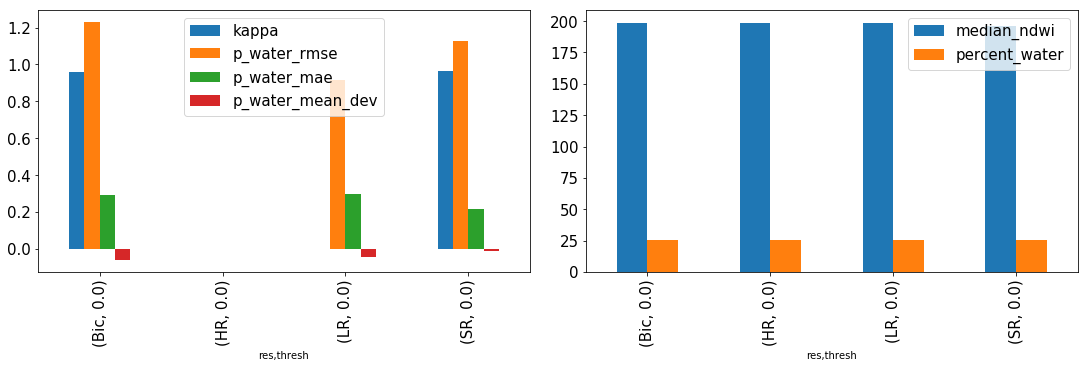

In [102]:
# groupby, then plot

group11=group1.groupby(level='thresh', squeeze=True)

    # plot options
fs =15 # font size

# group11 =group1.reset_index()
# group11.groupby(['res', 'thresh']).mean()
# fig, ax = plt.subplots(len(group1.index.levels[0]),1)
k=0 # init
# group11.set_index(['thresh','res'])
for thresh, res in group11:
    print('Thres:', thresh, '\ngroup:\n')
#     print('Res:', res, '\ngroup:\n')
    display(res.head(20))
#     ax[k].bar(res)
#     plt.subplot(len(group1.index.levels[0]),1,k+1)

        # uncomment for various plots:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
#     res[['percent_water'	,'median_ndwi'	,'kappa',	'p_water_rmse',	'p_water_mae',		'p_water_mean_dev']].plot.bar(subplots=False) # rm cov
    res[['kappa',	'p_water_rmse',	'p_water_mae',		'p_water_mean_dev']].plot.bar(subplots=False, ax=axs[0], fontsize=fs) # rm cov
    res[['median_ndwi', 'percent_water']].plot.bar(subplots=False, ax=axs[1], fontsize=fs)
    for j in range(len(axs)): axs[j].legend(fontsize=fs)
    k+=1

,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,,,,,,,,
Bic,25.454658,198.636385,0.959795,-0.072545,1.229084,0.291117,452.895096,-0.060458
HR,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
LR,25.436819,198.677934,NaN,NaN,0.915515,0.299729,452.983165,-0.042620
SR,25.403698,195.731690,0.966612,0.087026,1.129046,0.216900,454.678906,-0.009498


Text(0.5, 0, 'Resolution')

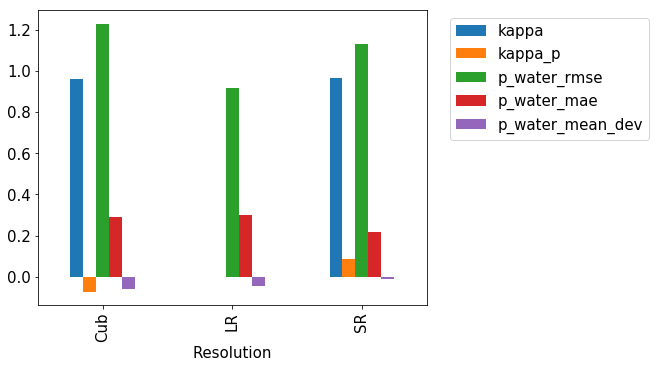

In [174]:
fs=15
fig, ax1 = plt.subplots(figsize=(9,5), constrained_layout=True)
# group1_plot=group1.iloc[[0,1,3]]
group1_plot=group1.copy()
group1_plot.reset_index(level=1,drop=True, inplace=True)
display(group1_plot)
# del group1_plot[2:3]
group1_plot.iloc[[0,2,3]][['kappa','kappa_p','p_water_rmse','p_water_mae','p_water_mean_dev']].plot.bar(ax=ax1)
# plt.xticks(range(4),['Cub','HR','LR','SR'], fontsize=fs)
plt.xticks(range(3),['Cub','LR','SR'], fontsize=fs)
plt.yticks(fontsize=fs)
# ax2=ax1.twinx()
# group1['percent_water'].plot.bar(ax=ax2)
# ax1.legend(fontsize=fs, loc='outer right')
ax1.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=fs)
ax1.set_xlabel('Resolution', fontsize=fs)

In [162]:
group1_plot=group1.copy()
group1_plot.reset_index(level=1,drop=True, inplace=True)
# group1_plot.drop_index()
group1_plot.iloc[2,:]
# group1_plot

AttributeError: __delitem__

,,percent_water,median_ndwi,kappa,kappa_p,p_water_rmse,p_water_mae,p_water_cov,p_water_mean_dev
res,thresh,,,,,,,,
Bic,0.0,25.454658,198.636385,0.959795,-0.072545,1.229084,0.291117,452.895096,-0.060458
HR,0.0,25.394200,198.464789,NaN,NaN,NaN,NaN,NaN,NaN
SR,0.0,25.403698,195.731690,0.966612,0.087026,1.129046,0.216900,454.678906,-0.009498


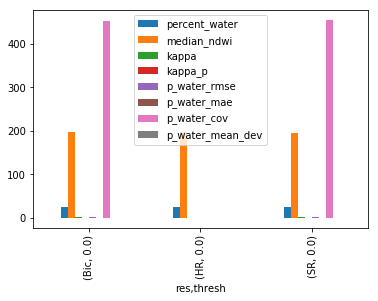

In [127]:
group1_plot.plot.bar()
# group1_plot[['kappa', 'kappa_p']].plot.bar()
group1_plot
# plt.bar(range(3),group1_plot)

# Scratch paper

In [13]:
# get one image per line

df1=data[['num','res','kappa']][data.res=='Bic'].groupby(['num', 'res']).mean() # .loc[:100]
df2=data[['num','res','kappa']][data.res=='SR'].groupby(['num', 'res']).mean() # .loc[:100]
display(df1)
display(df2)
# display_side_by_side(df1,df2)

,,kappa
num,res,
0,Bic,0.943688
1,Bic,NaN
2,Bic,NaN
3,Bic,0.447292
4,Bic,0.293757
...,...,...
18492,Bic,0.761021
18493,Bic,0.456500
18494,Bic,0.864627


,,kappa
num,res,
0,SR,0.890319
1,SR,NaN
2,SR,NaN
3,SR,0.672183
4,SR,0.310908
...,...,...
18492,SR,0.771721
18493,SR,0.781841
18494,SR,0.820321


In [8]:
# aggregate?
data[data.res=='HR'].groupby('num').head()

,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
1,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.10,HR,74.950521,0.262562,0.316456,NaN,-0.992188,0.962264
5,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.05,HR,73.470052,0.262562,0.316456,NaN,-0.992188,0.962264
9,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,0.00,HR,59.705729,0.262562,0.316456,NaN,-0.992188,0.962264
13,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,0.05,HR,58.911458,0.262562,0.316456,NaN,-0.992188,0.962264
17,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,0.10,HR,58.022135,0.262562,0.316456,NaN,-0.992188,0.962264
...,...,...,...,...,...,...,...,...,...,...
517889,18496,20190828_185528_20_106b_3B_AnalyticMS_SR_s0184,-0.10,HR,70.073785,-0.287540,0.000000,NaN,-0.992188,0.974683
517893,18496,20190828_185528_20_106b_3B_AnalyticMS_SR_s0184,-0.05,HR,70.062500,-0.287540,0.000000,NaN,-0.992188,0.974683
517897,18496,20190828_185528_20_106b_3B_AnalyticMS_SR_s0184,0.00,HR,0.644965,-0.287540,0.000000,NaN,-0.992188,0.974683
517901,18496,20190828_185528_20_106b_3B_AnalyticMS_SR_s0184,0.05,HR,0.633247,-0.287540,0.000000,NaN,-0.992188,0.974683


In [9]:
bic=data[data.res=='Bic'].groupby(['num']).mean() # .loc[:100]
sr=data[data.res=='SR'].groupby(['num']).mean() # .loc[:100]
bic.head()

,thresh,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
num,,,,,,,
0,0.071429,62.845300,0.268765,0.333333,0.943688,-1.000000,1.000000
1,0.071429,0.000000,-0.938394,-0.986486,NaN,-1.000000,-0.300310
2,0.071429,100.000000,0.931091,0.931034,NaN,0.909091,0.944444
3,0.071429,1.694196,-0.311738,-0.252747,0.447292,-0.935829,0.295775
4,0.071429,5.704427,-0.645122,-0.783133,0.293757,-1.000000,1.000000


In [10]:
# try again # this shows how kappa fares for SR compared to Bic
data[['num', 'res','thresh','percent_water','median_ndwi','kappa']][:200].groupby(['thresh','num'], axis ='rows').mean()

percent_water  median_ndwi     kappa
thresh num                                      
-0.10  0        73.791450     0.324352  0.924278
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         9.438585    -0.252739  0.830494
       4        16.701931    -0.786208  0.925459
       5        17.449761    -0.209189  0.798443
       6         0.161024    -0.744181  0.715410
       7         6.690972    -0.941192  0.730980
-0.05  0        72.353299     0.324352  0.922333
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         3.225369    -0.252739  0.737248
       4        16.663520    -0.786208  0.926373
       5         7.401042    -0.209189  0.764505
       6         0.109375    -0.744181  0.672768
 0.00  0        60.829210     0.324352  0.931224
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         0.844727    -0.252739  0.608504
       4         0.796658    -0.786208  0.069593
       5         1.219293    -0.209189  0.621095
       6         0.064236    -0.744181  0.647543
 0.05  0        60.042860     0.324352  0.930150
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         0.286241    -0.252739  0.505469
       4         0.793186    -0.786208  0.062818
       5         0.079970    -0.209189  0.546534
       6         0.026801    -0.744181  0.426386
 0.10  0        59.162326     0.324352  0.927139
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         0.109375    -0.252739  0.505945
       4         0.790473    -0.786208  0.058507
       5         0.004232    -0.209189  0.102531
       6         0.007812    -0.744181  0.261855
 0.20  0        56.659722     0.324352  0.905255
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         0.030707    -0.252739  0.524193
       4         0.779948    -0.786208  0.039121
       5         0.000000    -0.209189       NaN
       6         0.000000    -0.744181       NaN
 0.30  0        51.770399     0.324352  0.878645
       1         0.000000    -0.987559       NaN
       2       100.000000     0.908276       NaN
       3         0.006836    -0.252739  0.206310
       4         0.774089    -0.786208  0.034457
       5         0.000000    -0.209189       NaN
       6         0.000000    -0.744181       NaN

In [11]:
# manual selection
data2=data[(data.res=='SR') & (data.thresh==0)] #.set_index(['num', 'res'])
data2
# df2.groupby(level=df2.index.names.difference(['B']))
# df2.index.names.difference(['num'])
data2.groupby('num').mean() #level='num'
data2

,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
8,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,0.0,SR,61.066406,0.223086,0.314286,0.917016,-1.000000,1.000000
36,1,20200105_150918_94_106e_3B_AnalyticMS_SR_s0178,0.0,SR,0.000000,-0.945568,-0.989418,NaN,-1.000000,-0.202381
64,2,20190816_064825_98_105e_3B_AnalyticMS_SR_s0063,0.0,SR,100.000000,0.844524,0.840000,NaN,0.500000,1.000000
92,3,20200222_035046_40_1067_3B_AnalyticMS_SR_s0680,0.0,SR,1.157986,-0.311281,-0.251852,0.687984,-1.000000,0.500000
120,4,20200530_134932_35_1063_3B_AnalyticMS_SR_s0334,0.0,SR,0.687500,-0.663255,-0.791209,0.101577,-1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
517784,18492,20190921_103716_15_105e_3B_AnalyticMS_SR_s0108,0.0,SR,10.208767,-0.436014,-0.511905,0.862498,-1.000000,0.769231
517812,18493,20190910_034015_47_1058_3B_AnalyticMS_SR_s0301,0.0,SR,0.036024,-0.869363,-0.909091,0.860712,-1.000000,1.000000
517840,18494,20191001_054635_06_1060_3B_AnalyticMS_SR_s0116,0.0,SR,84.580295,0.094058,0.105740,0.811701,-0.326861,1.000000
517868,18495,20190911_080109_58_1063_3B_AnalyticMS_SR_s0172,0.0,SR,96.505208,0.500992,0.692308,0.417782,-0.112903,1.000000


In [196]:
# groupby /aggregate selection # not what I want because
data2=data[(data.res=='SR')] #.set_index(['num', 'res']) #  (data.thresh==0)
data2
# df2.groupby(level=df2.index.names.difference(['B']))
# df2.index.names.difference(['num'])
data2.groupby('num').aggregate(['mean'], axis='rows') # axis doesn't matter for aggregate here # HERE
# data2.groupby('num').head()

,thresh,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
,mean,mean,mean,mean,mean,mean,mean
num,,,,,,,
0,0.071429,61.027220,0.223086,0.314286,0.890319,-1.000000,1.000000
1,0.071429,0.000000,-0.945568,-0.989418,NaN,-1.000000,-0.202381
2,0.071429,100.000000,0.844524,0.840000,NaN,0.500000,1.000000
3,0.071429,2.345362,-0.311281,-0.251852,0.672183,-1.000000,0.500000
4,0.071429,4.844742,-0.663255,-0.791209,0.310908,-1.000000,1.000000
...,...,...,...,...,...,...,...
18492,0.071429,7.905072,-0.436014,-0.511905,0.771721,-1.000000,0.769231
18493,0.071429,0.030196,-0.869363,-0.909091,0.781841,-1.000000,1.000000


In [26]:
    # wide to long format # https://chrisalbon.com/python/data_wrangling/pandas_long_to_wide/
# data.pivot(index='num', columns=['thresh', 'res'], values=['kappa', 'mean_ndwi'])
data.head(5)
# group2=data[['num', 'res','thresh','percent_water','median_ndwi','kappa']].groupby(['thresh'])
# group2.mean()
# data.pivot(index='num', columns='res', values=['kappa', 'mean_ndwi'])


,num,name,thresh,res,percent_water,mean_ndwi,median_ndwi,kappa,min_ndwi,max_ndwi
0,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.10,SR,70.671007,0.223086,0.314286,0.874314,-1.000000,1.000000
1,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.10,HR,74.950521,0.262562,0.316456,NaN,-0.992188,0.962264
2,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.10,LR,74.847222,0.268688,0.333333,NaN,-1.000000,1.000000
3,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.10,Bic,74.697049,0.268765,0.333333,0.974241,-1.000000,1.000000
4,0,20190921_103718_19_105e_3B_AnalyticMS_SR_s0515,-0.05,SR,69.250000,0.223086,0.314286,0.872888,-1.000000,1.000000


In [345]:
# crosstab
# pd.crosstab(titanic.survived, titanic['class'])
pd.crosstab(data.res, data.thresh)

thresh,-0.10,-0.05,0.00,0.05,0.10,0.20,0.30
res,,,,,,,
Bic,18497,18497,18497,18497,18497,18497,18497
HR,18497,18497,18497,18497,18497,18497,18497
LR,18497,18497,18497,18497,18497,18497,18497
SR,18497,18497,18497,18497,18497,18497,18497


In [ ]:
# aggregate - doesn't work as inteneded
group1
# group1.aggregate('mean', axis=0)
data.aggregate('mean', axis=0)

In [30]:
# pivot! # need to aggregate num by res so that index is unique
# dataW.pivot(index=['num', 'res'], columns='thresh', values=['kappa'])
dataP=data.pivot(columns='thresh', values=['kappa', 'mean_ndwi', 'num', 'res'])
dataP.head(30)

# group1
# data
# dataW

kappa                                                              \
thresh     -0.10     -0.05      0.00      0.05      0.10      0.20      0.30   
0       0.874314       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3       0.974241       NaN       NaN       NaN       NaN       NaN       NaN   
4            NaN  0.872888       NaN       NaN       NaN       NaN       NaN   
5            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
7            NaN  0.971779       NaN       NaN       NaN       NaN       NaN   
8            NaN       NaN  0.917016       NaN       NaN       NaN       NaN   
9            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
11           NaN       NaN  0.945431       NaN       NaN       NaN       NaN   
12           NaN       NaN       NaN  0.915825       NaN       NaN       NaN   
13           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
14           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
15           NaN       NaN       NaN  0.944475       NaN       NaN       NaN   
16           NaN       NaN       NaN       NaN  0.911945       NaN       NaN   
17           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
18           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
19           NaN       NaN       NaN       NaN  0.942332       NaN       NaN   
20           NaN       NaN       NaN       NaN       NaN  0.884306       NaN   
21           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
22           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
23           NaN       NaN       NaN       NaN       NaN  0.926204       NaN   
24           NaN       NaN       NaN       NaN       NaN       NaN  0.855937   
25           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
26           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
27           NaN       NaN       NaN       NaN       NaN       NaN  0.901352   
28           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
29           NaN       NaN       NaN       NaN       NaN       NaN       NaN   

       mean_ndwi                      ...   num               res              \
thresh     -0.10     -0.05      0.00  ...  0.10  0.20  0.30 -0.10 -0.05  0.00   
0       0.223086       NaN       NaN  ...   NaN   NaN   NaN    SR   NaN   NaN   
1       0.262562       NaN       NaN  ...   NaN   NaN   NaN    HR   NaN   NaN   
2       0.268688       NaN       NaN  ...   NaN   NaN   NaN    LR   NaN   NaN   
3       0.268765       NaN       NaN  ...   NaN   NaN   NaN   Bic   NaN   NaN   
4            NaN  0.223086       NaN  ...   NaN   NaN   NaN   NaN    SR   NaN   
5            NaN  0.262562       NaN  ...   NaN   NaN   NaN   NaN    HR   NaN   
6            NaN  0.268688       NaN  ...   NaN   NaN   NaN   NaN    LR   NaN   
7            NaN  0.268765       NaN  ...   NaN   NaN   NaN   NaN   Bic   NaN   
8            NaN       NaN  0.223086  ...   NaN   NaN   NaN   NaN   NaN    SR   
9            NaN       NaN  0.262562  ...   NaN   NaN   NaN   NaN   NaN    HR   
10           NaN       NaN  0.268688  ...   NaN   NaN   NaN   NaN   NaN    LR   
11           NaN       NaN  0.268765  ...   NaN   NaN   NaN   NaN   NaN   Bic   
12           NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
13           NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
14           NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
15           NaN       NaN       NaN  ...   NaN   NaN   NaN   NaN   NaN  

In [251]:
i='Bic'
j=0
group1.loc[(i, j)]
np.cov(pd.DataFrame(data=[dataW1.loc[('HR', j)].percent_water, dataW1.loc[('HR', 0.1)].percent_water]))[0,1]
# dataW1.loc[('HR', j)].percent_water
# dataW1.loc[('HR', j)].percent_water
group1.loc[('HR', j)].percent_water-group1.loc[(i, j)].percent_water
# group1

/home/ekyzivat/miniconda2/envs/geohack/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


-0.5524176593200991